In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Set pyplot style settings with a gray grid
plt.style.use('ggplot')

## Implementation

In [11]:
n_pts = 500
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, Y = datasets.make_circles(n_samples=n_pts, random_state=42, noise=0.1, factor=0.2)
x_data = torch.Tensor(X)
y_data = torch.Tensor(Y.reshape(500, 1))

In [12]:
def scatterplot():
    plt.scatter(X[Y==0, 0], X[Y==0, 1])
    plt.scatter(X[Y==1, 0], X[Y==1, 1])

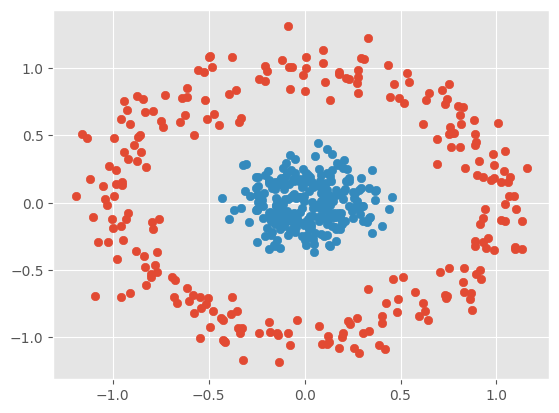

In [13]:
scatterplot()

In [14]:
class Model(nn.Module):
    def __init__(self, input_size, H1, output_size):    # H1 = Hidden layer 1 Nodes
        super().__init__()
        self.linear = nn.Linear(input_size, H1)
        self.linear2 = nn.Linear(H1, output_size)       # Hidden layer 1
    def forward(self, x):
        x = torch.sigmoid(self.linear(x))
        x = torch.sigmoid(self.linear2(x))
        return x
    def predict(self, x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [15]:
torch.manual_seed(2)
model = Model(2, 4, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [19]:
criteria = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [20]:
epochs = 1000
losses = []
for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criteria(y_pred, y_data)
    print("epoch:", i, "loss:", loss.item())
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 0 loss: 0.03673533350229263
epoch: 1 loss: 0.03480635583400726
epoch: 2 loss: 0.03367574140429497
epoch: 3 loss: 0.031993452459573746
epoch: 4 loss: 0.030352409929037094
epoch: 5 loss: 0.029117576777935028
epoch: 6 loss: 0.027911582961678505
epoch: 7 loss: 0.026607416570186615
epoch: 8 loss: 0.02541440911591053
epoch: 9 loss: 0.02440238930284977
epoch: 10 loss: 0.023441923782229424
epoch: 11 loss: 0.022452274337410927
epoch: 12 loss: 0.021480541676282883
epoch: 13 loss: 0.020593909546732903
epoch: 14 loss: 0.019793013110756874
epoch: 15 loss: 0.019028697162866592
epoch: 16 loss: 0.01827382482588291
epoch: 17 loss: 0.017547760158777237
epoch: 18 loss: 0.016877291724085808
epoch: 19 loss: 0.016260450705885887
epoch: 20 loss: 0.01567370817065239
epoch: 21 loss: 0.015101625584065914
epoch: 22 loss: 0.01454952172935009
epoch: 23 loss: 0.014030746184289455
epoch: 24 loss: 0.01354906614869833
epoch: 25 loss: 0.013095268048346043
epoch: 26 loss: 0.01265830360352993
epoch: 27 loss: 0.012

Text(0.5, 0, 'epoch')

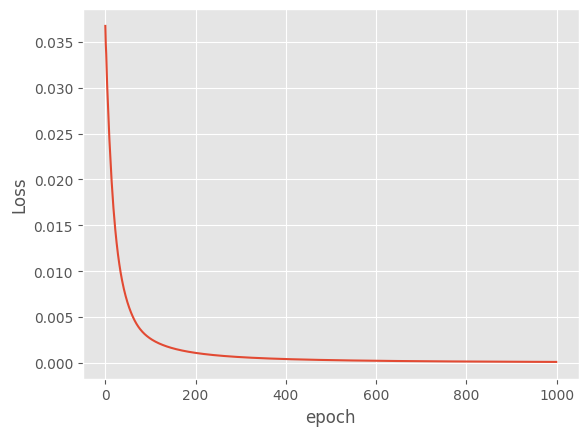

In [21]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [22]:
# Plot the decision boundary
def plot_decision_boundary(X, y):
    '''Plot the decision boundary given X and y'''
    x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0]) + 0.25)      # min and max of x with 0.25 buffer - create equally spaced points in that range
    y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1]) + 0.25)      # min and max of y with 0.25 buffer and euqllay spaced points
    xx, yy = np.meshgrid(x_span, y_span)                                # create 2 2D arrays of copies of x_span and y_span
    grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])                  # Flatten the 2 2D arrays into 1D arrays and stack them into a 2D tensor
    pred_func = model.forward(grid)                                     # Pass each point in our created grid through our trained model - return a tensor of predictions
    z = pred_func.view(xx.shape).detach().numpy()                       # Reshape the predictions to match the shape of xx and yy and convert to numpy array for plotting
    plt.contourf(xx, yy, z)                                             # Plot the contour lines

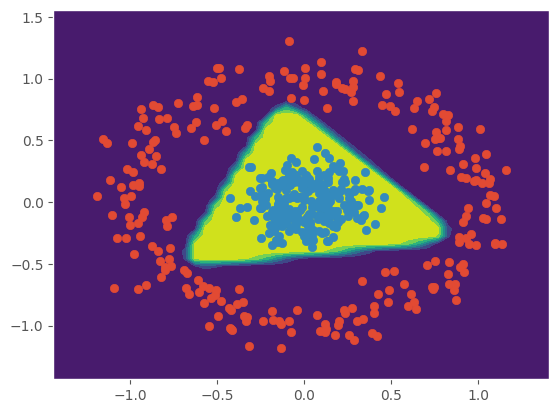

In [27]:
# Plot the decision boundary and training points
plot_decision_boundary(X, Y)
scatterplot()

Prediction is: 1


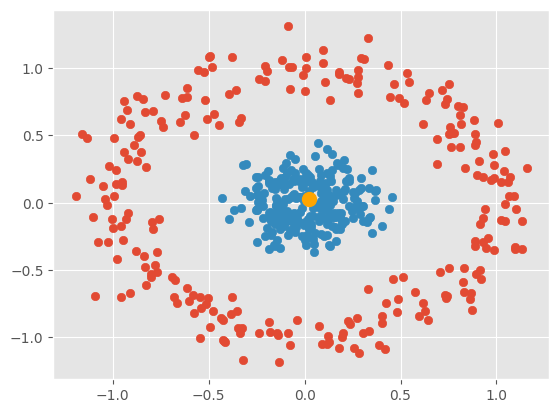

In [26]:
# Plot the data points with the decision boundary
scatterplot()
x = 0.025
y = 0.025
point = torch.Tensor([x, y])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="orange")
print("Prediction is:", prediction)
plt.show()